In [40]:
from utils import get_data, load_model , dictionry_to_class
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [41]:
#Define the configurations as a dictionary (*for further research, it is preferable to move it into a separate file out of the code).

configs_dict = dict(train_data_path = "data/train_home_assignment_.csv",
                   target_col = "org_price_usd_following_30_days",
                   columns_to_drop = ["treatment", "org_price_usd_following_30_days_after_impact"],
                   models_directory = "models",
                   model_name = "xbg_regressor_model_task1",
                   time_format = "%Y_%m_%d-%H_%M_%S",
                   model_file_type = "json",
                   model_path = "models/xbg_regressor_model_task1_2023_04_15-22_14_53.json",
                   treatment_col_name = "treatment",
                   new_treatment_col_name = "optimal_treatment",
                   data_directory = "data",
                   test_size = 0.2,
                   treatment_values = [2,10])

# Convert dictionary into class 
configs = dictionry_to_class(configs_dict)

In [42]:
# Load data, remove unnecessary columns, split to train test 
X_train, X_test, y_train, y_test = get_data(path = configs.train_data_path, 
                                            target_col = configs.target_col, 
                                            test_size = configs.test_size,
                                            columns_to_drop = configs.columns_to_drop)

In [43]:
xgb_regressor_gs_cv_pipline = load_model(model_path = configs.model_path)
model = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.regressor

In [44]:
X_train_transformed = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.preprocessor.transform(X_train)
X_test_transformed = xgb_regressor_gs_cv_pipline.best_estimator_.named_steps.preprocessor.transform(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error
reg = XGBRegressor( learning_rate =model.learning_rate ,
                     max_depth =model.max_depth ,
                     min_child_weight =model.min_child_weight ,
                     subsample =model.subsample ,
                     colsample_bytree =model.colsample_bytree ,
                     n_estimators =model.n_estimators ,
                     objective='reg:squarederror', 
                     reg_alpha = model.reg_alpha,
                     reg_lambda = model.reg_lambda,
                     eval_metric='rmse')

reg.fit(X_train_transformed, y_train, eval_set=[(X_train_transformed, y_train),(X_test_transformed, y_test)])

[0]	validation_0-rmse:155.48358	validation_1-rmse:155.63263
[1]	validation_0-rmse:146.85788	validation_1-rmse:147.65132
[2]	validation_0-rmse:139.25492	validation_1-rmse:140.58111
[3]	validation_0-rmse:132.68534	validation_1-rmse:134.57626
[4]	validation_0-rmse:127.07240	validation_1-rmse:129.13428
[5]	validation_0-rmse:122.14706	validation_1-rmse:124.20821
[6]	validation_0-rmse:117.90593	validation_1-rmse:120.56232
[7]	validation_0-rmse:114.23345	validation_1-rmse:117.34318
[8]	validation_0-rmse:111.03165	validation_1-rmse:114.59277
[9]	validation_0-rmse:108.30442	validation_1-rmse:112.42927
[10]	validation_0-rmse:105.85126	validation_1-rmse:110.66210
[11]	validation_0-rmse:103.72996	validation_1-rmse:109.04512
[12]	validation_0-rmse:101.84792	validation_1-rmse:107.35447
[13]	validation_0-rmse:100.37883	validation_1-rmse:106.19635
[14]	validation_0-rmse:98.88335	validation_1-rmse:105.58750
[15]	validation_0-rmse:97.65332	validation_1-rmse:105.07003
[16]	validation_0-rmse:96.61821	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

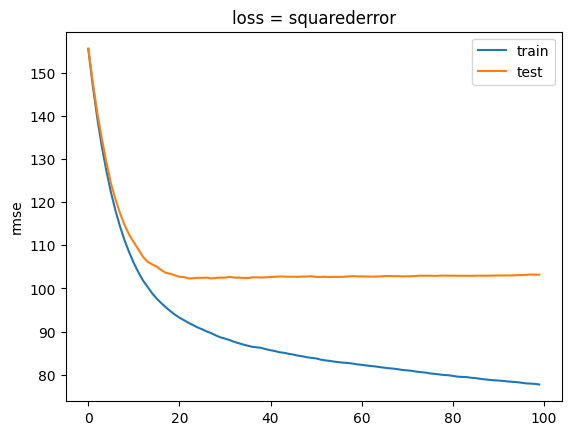

In [55]:
results = reg.evals_result()

# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
plt.ylabel("rmse")
plt.title("loss = squarederror")
# show the plot
plt.savefig("gif/loss_convergence_squaredlogerror_eval_rmse.png")
plt.show()